In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [5]:
df_totals = pd.read_csv(os.path.join(path, 'Cleaned Data', 'total_injured_and_killed.csv'))

In [6]:
df = df[df['date'].between('2014-01-01','2021-12-31')]

In [7]:
df.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
18230,18230,2203919,2021-12-31,Texas,Beaumont,1500 block of Cartwright St,1,0,2021,12,31,4,1
18231,18231,2201909,2021-12-31,Ohio,Cleveland,Rexford Ave,1,0,2021,12,31,4,1
18232,18232,2201237,2021-12-31,Washington,Spanaway,21600 block of 41st Ave E,1,0,2021,12,31,4,1
18233,18233,2201905,2021-12-31,Texas,Corpus Christi,4100 block of Brett St,0,1,2021,12,31,4,1
18234,18234,2200960,2021-12-31,North Dakota,Williston,NaN,1,0,2021,12,31,4,1


In [8]:
df_totals.head()

,Unnamed: 0,state,people_killed,people_injured,total_hurt
0,0,Vermont,120,147,267
1,1,Wyoming,139,96,235
2,2,North Dakota,153,225,378
3,3,Rhode Island,161,581,742
4,4,Hawaii,170,191,361


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453478 entries, 18230 to 471707
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      453478 non-null  int64 
 1   incident_id     453478 non-null  int64 
 2   date            453478 non-null  object
 3   state           453478 non-null  object
 4   city            453478 non-null  object
 5   address         430221 non-null  object
 6   people_killed   453478 non-null  int64 
 7   people_injured  453478 non-null  int64 
 8   year            453478 non-null  int64 
 9   month           453478 non-null  int64 
 10  monthday        453478 non-null  int64 
 11  day_of_week     453478 non-null  int64 
 12  hurt            453478 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 48.4+ MB


In [10]:
#Deleting non-numerical columns
df_n = df.drop(columns=['Unnamed: 0', 'date', 'state', 'city', 'address'])

In [11]:
df_n.head()

,incident_id,people_killed,people_injured,year,month,monthday,day_of_week,hurt
18230,2203919,1,0,2021,12,31,4,1
18231,2201909,1,0,2021,12,31,4,1
18232,2201237,1,0,2021,12,31,4,1
18233,2201905,0,1,2021,12,31,4,1
18234,2200960,1,0,2021,12,31,4,1


In [12]:
df_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      51 non-null     int64 
 1   state           51 non-null     object
 2   people_killed   51 non-null     int64 
 3   people_injured  51 non-null     int64 
 4   total_hurt      51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [13]:
#Deleting non-numerical columns
df_totals_n = df_totals.drop(columns=['Unnamed: 0', 'state'])

In [14]:
df_totals_n.head()

,people_killed,people_injured,total_hurt
0,120,147,267
1,139,96,235
2,153,225,378
3,161,581,742
4,170,191,361


# Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_n).score(df_n) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anacond

[-1.7568550887324128e+17,
 -4.239824938804554e+16,
 -1.841059004830807e+16,
 -1.0612518427945056e+16,
 -6844341355946858.0,
 -4724785968760062.0,
 -3415859148497143.5,
 -2628725301927540.0,
 -2039831364802446.5]

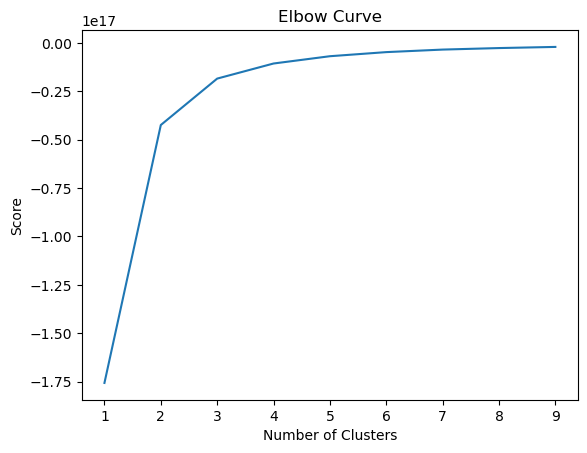

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters I choose is 3 because the curve rapidly slows at this number of clusters

# K-means clustering

In [18]:
kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
#Attaching a new column 'clusters'
df_n['clusters'] = kmeans.fit_predict(df_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
df_n.head()

,incident_id,people_killed,people_injured,year,month,monthday,day_of_week,hurt,clusters
18230,2203919,1,0,2021,12,31,4,1,2
18231,2201909,1,0,2021,12,31,4,1,2
18232,2201237,1,0,2021,12,31,4,1,2
18233,2201905,0,1,2021,12,31,4,1,2
18234,2200960,1,0,2021,12,31,4,1,2


In [22]:
df_n['clusters'].value_counts()

1    160792
0    146631
2    146055
Name: clusters, dtype: int64

# Plotting clusters

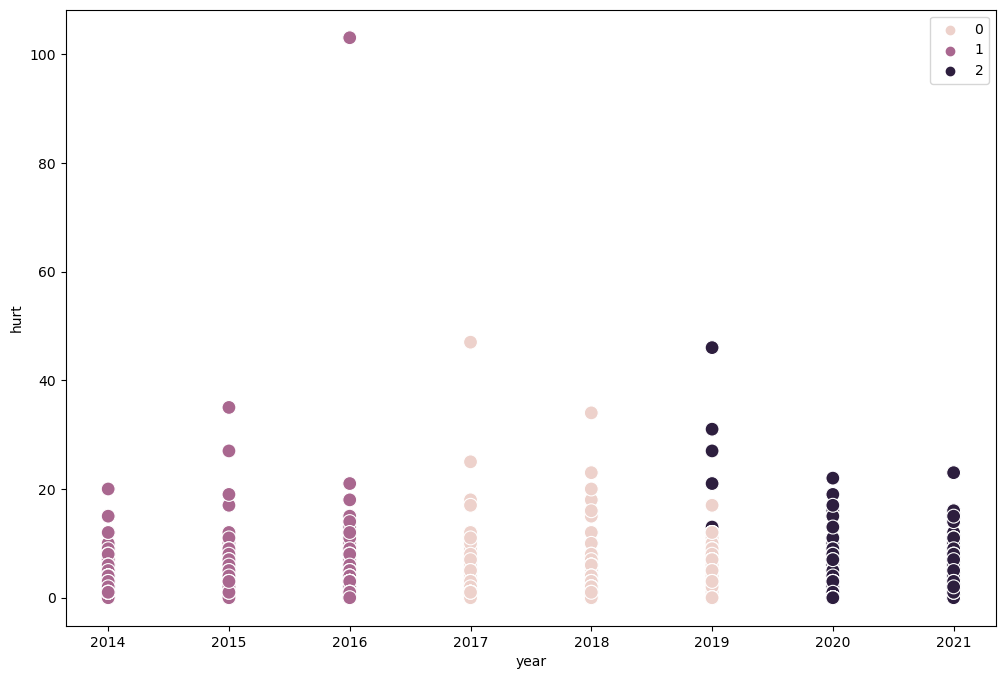

In [23]:
# Plot the clusters for the "Year" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['year'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

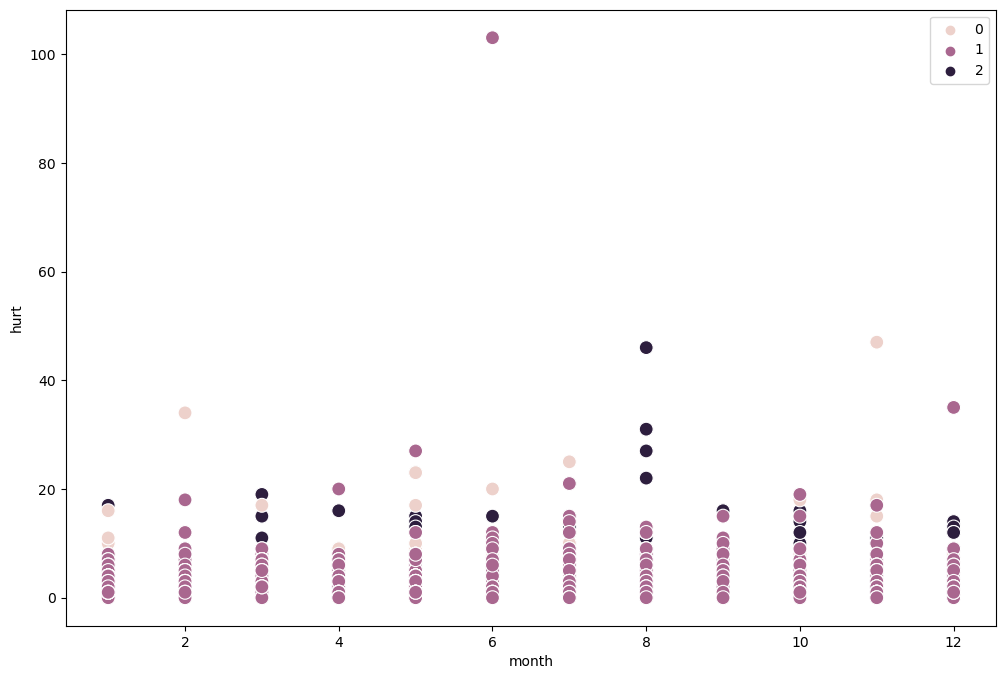

In [24]:
# Plot the clusters for the "Year" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['month'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('month') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

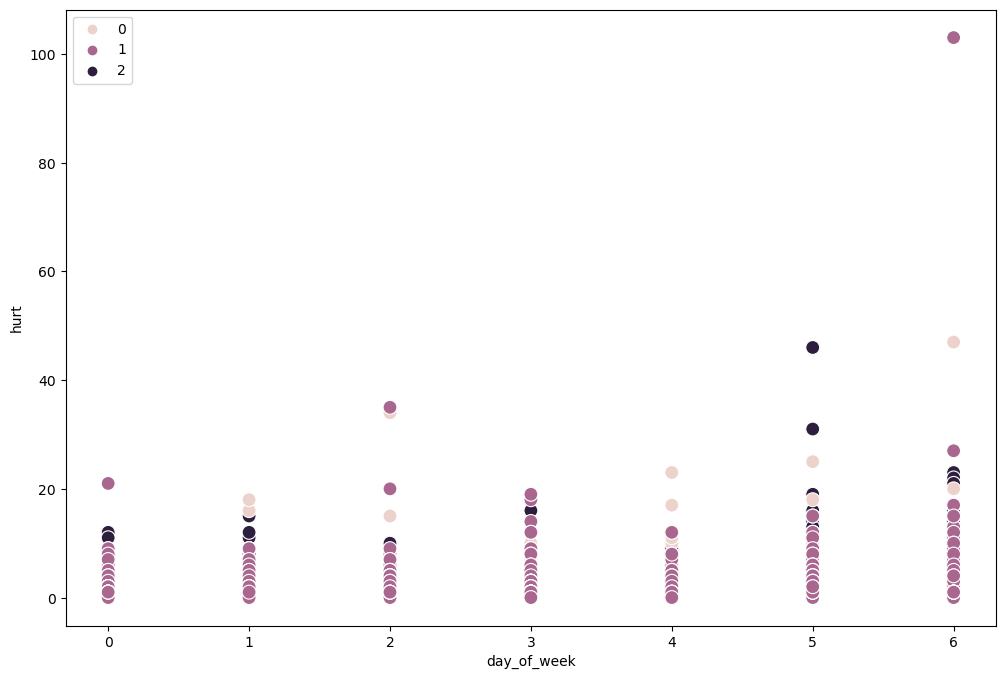

In [25]:
# Plot the clusters for the "day of week" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['day_of_week'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('day_of_week') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3) 

In [27]:
# Fit the k-means object to the data.

kmeans.fit(df_totals_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
#Attaching a new column 'clusters'
df_totals_n['clusters'] = kmeans.fit_predict(df_totals_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df_totals_n.head()

,people_killed,people_injured,total_hurt,clusters
0,120,147,267,0
1,139,96,235,0
2,153,225,378,0
3,161,581,742,0
4,170,191,361,0


In [30]:
df_totals_n['clusters'].value_counts()

0    31
1    15
2     5
Name: clusters, dtype: int64

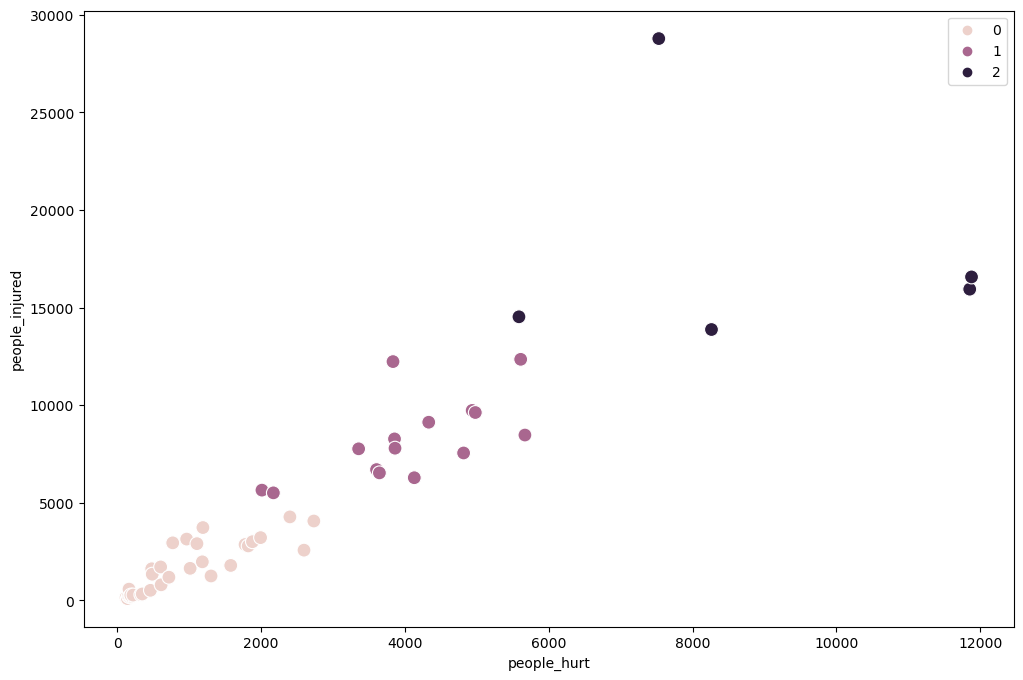

In [31]:
# Plot the clusters for the "People killed" and "People Injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_totals_n['people_killed'], y=df_totals_n['people_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('people_hurt') # Label x-axis.
plt.ylabel('people_injured') # Label y-axis.
plt.show()

In [32]:
df_totals_n.loc[df_totals_n['clusters'] == 2, 'cluster'] = 'dark purple'
df_totals_n.loc[df_totals_n['clusters'] == 1, 'cluster'] = 'purple'
df_totals_n.loc[df_totals_n['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
df_totals_n.groupby('cluster').agg({'people_killed':['mean', 'median'], 
                         'people_injured':['mean', 'median'], 
                         'total_hurt':['mean', 'median']})

people_killed         people_injured             total_hurt  \
                     mean  median           mean   median          mean   
cluster                                                                   
dark purple   9022.600000  8263.0   17943.000000  15946.0  26965.600000   
pink           955.967742   716.0    1679.419355   1623.0   2635.387097   
purple        4052.866667  3861.0    8243.200000   7800.0  12296.066667   

                      
              median  
cluster               
dark purple  27801.0  
pink          2318.0  
purple       12130.0

This form of analysis showed me various clusters for the total hurt chart and the original dataframe. It wasn't very fruitful for me with my analysis. However, I noticed that the third cluster chart shows me there were many people hurt on day 6 which is saturday. I also noticed that there is more people injured than killed in each state when looking at the mean number of people injured in each of the clusters. 